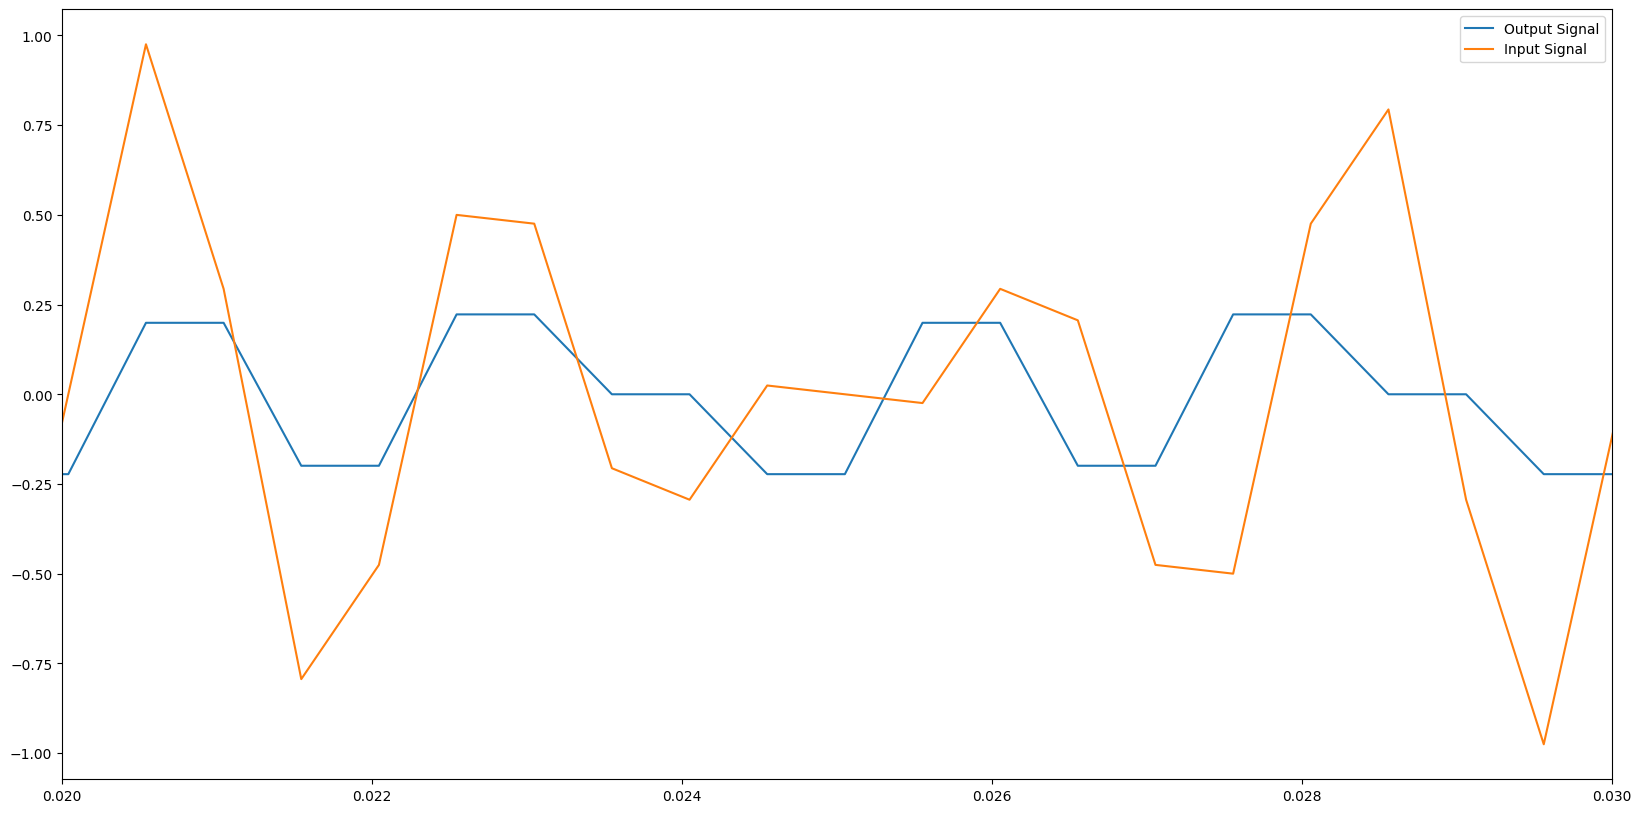

In [22]:
from fxpmath import Fxp
import matplotlib.pyplot as plt
import numpy as np

# Define parameters for the sinusoidal waves
amplitude1 = 0.5
fs = 2000  # Sampling rate (samples per second)

t = np.arange(0, 1, 1/fs)  # Time vector from 0 to 1 second

freq1 = 400  # Frequency of the first sinusoid (in Hz)
freq2 = 500  # Frequency of the second sinusoid (in Hz)
amplitude2 = 0.5  

BIT_FORMAT = Fxp(None, signed=True, n_word=10, n_frac=8, overflow='wrap')


sinusoid1 = amplitude1 * np.sin(2 * np.pi * freq1 * t)
sinusoid2 = amplitude2 * np.sin(2 * np.pi * freq2 * t)


result = sinusoid1 + sinusoid2

output_hex = []
with open("output.hex", "r") as f:
    for line in f:
        value = line.strip()
        output_hex.append(str(value))
     
def hex_s2_8_to_decimal(hex_str):
    # Assuming the input hex_str is a 10-bit value in S2.8 format
    # Convert hex to decimal
    decimal_value = int(hex_str, 16)

    # Handle the sign bit (S)
    sign_bit = (decimal_value & 0x200) >> 9  # Extract sign bit
    decimal_value &= 0x1FF  # Mask out the sign bit

    # If negative, apply two's complement
    if sign_bit:
        decimal_value = -(decimal_value ^ 0x1FF) - 1

    # Convert to floating-point with scaling (8 fractional bits)
    decimal_value /= 2**8

    return decimal_value

output_hex = output_hex[133:-1]

sampling_rate = 1996  # Sampling rate in Hz (2 kHz)
duration = 1  # Duration of the signal in seconds
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

output_dec = []
for value in output_hex:
    output_dec.append(hex_s2_8_to_decimal(value))
    
input_dec = []
for input_value in input_dec:
    input_dec.append(hex_s2_8_to_decimal(input_value))
    
plt.figure(figsize=(20, 10))

plt.xlim(0.02, 0.03)
plt.plot(time, output_dec, label="Output Signal")
plt.plot(time, result[:1996], label="Input Signal")
plt.legend()
plt.savefig("FIR64_RESULTS.png")